# MODUL 3 TRANFORMASI WAVELET

1. Melakukan dekomposisi citra

## Import Library

In [111]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 as cv

Kode di atas digunakan untuk mengimpor library yang diperlukan untuk memproses dan memvisualisasikan gambar, seperti matplotlib, numpy, dan OpenCV. Library matplotlib.pyplot digunakan untuk membuat plot grafik untuk memvisualisasikan data, matplotlib.image untuk memuat dan menampilkan gambar, numpy untuk operasi matematika pada array, dan OpenCV untuk membaca gambar dari file. Dengan menggunakan kode ini, kita dapat memuat gambar, mengonversinya menjadi array numerik, serta melakukan berbagai operasi seperti normalisasi, dekomposisi wavelet, dan visualisasi hasilnya.

## Menampilkan Citra Asli

Kode di bawah ini digunakan untuk memuat gambar "IoriYagami.jpg" menggunakan matplotlib.image.imread() dan menampilkannya sebagai gambar menggunakan matplotlib.pyplot.imshow(). Mengatur cmap menjadi "gray" memastikan bahwa gambar ditampilkan dalam skala abu-abu. Dengan memanggil plt.axis("off"), sumbu gambar dinonaktifkan sehingga tidak ditampilkan. Keseluruhannya, ini adalah cara untuk memuat dan menampilkan gambar dengan menggunakan Matplotlib.

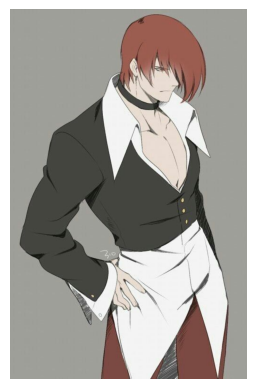

In [112]:
img = mpimg.imread("IoriYagami.jpg")
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

## Menampilkan Citra Skala Abu-Abu

In [113]:
def bgrgray(img):
    tinggi, lebar = img.shape[:2]
    gray_img = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(tinggi):
        for j in range(lebar):
            gray_img[i,j] = int(0.2989*img[i][j][0] + 0.5870*img[i][j][1] + 0.1140*img[i][j][2])
            
    return gray_img

Kode di atas adalah sebuah fungsi yang digunakan untuk mengkonversi gambar warna dalam format BGR (Blue, Green, Red) menjadi gambar skala abu-abu. Fungsi ini melakukan konversi piksel per piksel dari gambar BGR ke gambar skala abu-abu menggunakan formula yang telah ditentukan, yaitu 0.2989 untuk komponen biru, 0.5870 untuk komponen hijau, dan 0.1140 untuk komponen merah. Proses ini menghasilkan gambar yang hanya memiliki satu saluran warna (grayscale), dengan intensitas yang merefleksikan kecerahan piksel asli. Setelah konversi selesai, gambar skala abu-abu tersebut dikembalikan sebagai hasil fungsi.

Kode di bawah ini mengambil gambar img, yang sebelumnya dimuat menggunakan mpimg.imread(), dan menerapkannya ke fungsi bgrgray(). Fungsi bgrgray() mengubah gambar tersebut menjadi gambar skala abu-abu menggunakan metode yang telah dijelaskan sebelumnya. Setelah konversi selesai, gambar skala abu-abu tersebut ditampilkan menggunakan plt.imshow() dengan colormap "gray" untuk memastikan tampilan dalam skala abu-abu, dan plt.axis("off") untuk menonaktifkan sumbu gambar. Ini adalah cara untuk memuat gambar dalam format BGR, mengubahnya menjadi gambar skala abu-abu, dan menampilkannya menggunakan Matplotlib.

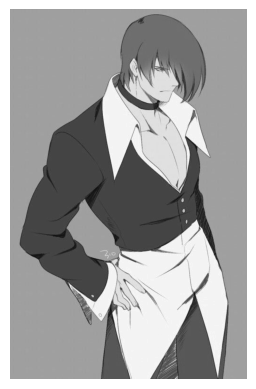

In [114]:
gray_img = bgrgray(img)
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()

## Melakukan Pendefinisian Low Pass dan High Pass Filter

In [115]:
low_pass = np.array([0.7, 0.7])
high_pass = np.array([-0.7, 0.7])

Kode di atas mendefinisikan filter low-pass dan high-pass untuk digunakan dalam dekomposisi wavelet. Filter low-pass (low_pass) digunakan untuk mengekstraksi informasi rendah frekuensi dari gambar, sedangkan filter high-pass (high_pass) digunakan untuk mengekstraksi informasi tinggi frekuensi. Setiap filter direpresentasikan sebagai array numpy dengan dua elemen, yang mewakili bobot yang akan diterapkan pada sinyal gambar. Dalam kasus ini, filter low-pass memiliki bobot positif, sementara filter high-pass memiliki bobot yang berbeda dengan satu bobot positif dan yang lainnya negatif. Kedua filter ini akan digunakan dalam proses dekomposisi wavelet untuk memisahkan komponen frekuensi dalam gambar.

## Melakukan Fungsi Dekomposisi Citra

In [122]:
def dekomposisi_gambar(gambar_abu, low_pass, high_pass):
    
    if gambar_abu.shape[0] % 2 != 0:
        gambar_abu = gambar_abu[:-1, :]
    if gambar_abu.shape[1] % 2 != 0:
        gambar_abu = gambar_abu[:, :-1]

    hasil_low = np.zeros((gambar_abu.shape[0], gambar_abu.shape[1]//2), dtype=float)
    
    hasil_high = np.zeros((gambar_abu.shape[0], gambar_abu.shape[1]//2), dtype=float)
    
    hasil_ll = np.zeros((hasil_low.shape[0]//2, hasil_low.shape[1]), dtype=float)
    
    hasil_lh = np.zeros((hasil_low.shape[0]//2, hasil_low.shape[1]), dtype=float)
    
    hasil_hl = np.zeros((hasil_low.shape[0]//2, hasil_low.shape[1]), dtype=float)
    
    hasil_hh = np.zeros((hasil_low.shape[0]//2, hasil_low.shape[1]), dtype=float)
    
    for i in range(0, gambar_abu.shape[0], 1):
        for j in range(0, gambar_abu.shape[1], 2):
            hasil_low[i, j//2] = (gambar_abu[i, j]*low_pass[0]+gambar_abu[i, j+1]*low_pass[1])/2
            hasil_high[i, j//2] = (gambar_abu[i, j]*high_pass[0]+gambar_abu[i, j+1]*high_pass[1])/2

    for i in range(0, hasil_low.shape[0], 2):
        for j in range(0, hasil_low.shape[1], 1):
            hasil_ll[i//2, j] = (hasil_low[i, j]*low_pass[0]+hasil_low[i+1, j]*low_pass[1])/2
            hasil_lh[i//2, j] = (hasil_low[i, j]*high_pass[0]+hasil_low[i+1, j]*high_pass[1])/2
            hasil_hl[i//2, j] = (hasil_high[i, j]*low_pass[0]+hasil_high[i+1, j]*low_pass[1])/2
            hasil_hh[i//2, j] = (hasil_high[i, j]*high_pass[0]+hasil_high[i+1, j]*high_pass[1])/2
    
    return hasil_ll, hasil_lh, hasil_hl, hasil_hh


Kode di atas  adalah implementasi dari proses dekomposisi gambar menggunakan filter low-pass dan high-pass dalam operasi transformasi wavelet. Pada awalnya, gambar grayscale yang diterima sebagai input akan diubah ukurannya jika panjang atau lebarnya ganjil, agar ukurannya menjadi genap, karena proses dekomposisi wavelet umumnya membutuhkan ukuran gambar yang genap. Kemudian, gambar akan dibagi menjadi dua bagian, yaitu bagian low-pass (hasil_low) dan high-pass (hasil_high), dengan masing-masing bagian mengandung separuh dari lebar gambar asli. Setelah itu, kedua bagian ini akan dibagi lagi menjadi sub-bagian, yaitu LL (hasil_ll), LH (hasil_lh), HL (hasil_hl), dan HH (hasil_hh). Proses pembagian ini dilakukan dengan menerapkan filter low-pass dan high-pass ke bagian-bagian gambar yang sesuai. Hasil akhir dari fungsi ini adalah empat bagian gambar yang telah didekomposisi sesuai dengan koefisien wavelet yang dihasilkan.

### Melakukan Fungsi Normalisasi

In [123]:
def normalisasi(img):
    imgNormalisasi = (img - np.min(img)) / (np.max(img) - np.min(img))
    return imgNormalisasi

Kode di atas adalah implementasi fungsi normalisasi yang digunakan untuk mengubah rentang intensitas piksel dalam gambar menjadi rentang antara 0 dan 1. Dalam proses normalisasi, setiap nilai piksel dalam gambar dikurangi dengan nilai piksel minimum dalam gambar dan kemudian dibagi dengan selisih antara nilai piksel maksimum dan minimum. Hal ini menyebabkan intensitas piksel dalam gambar disesuaikan sehingga nilai minimum menjadi 0 dan nilai maksimum menjadi 1, dengan mempertahankan proporsi relatif antara nilai piksel. Fungsi ini mengembalikan gambar yang telah dinormalisasi sebagai hasilnya. Normalisasi sering digunakan dalam pengolahan gambar untuk memperbaiki kontras dan memudahkan analisis.

In [124]:
def invers_normalisasi(imgNormal, img_ori):
    min_val = np.min(img_ori)
    max_val = np.max(img_ori)
    img_ori = imgNormal * (max_val - min_val) + min_val
    
    return img_ori

Kode di atas mengimplementasikan fungsi invers_normalisasi yang bertujuan untuk mengembalikan gambar yang telah dinormalisasi kembali ke rentang intensitas aslinya. Fungsi ini menerima dua parameter, yaitu gambar yang telah dinormalisasi (imgNormal) dan gambar asli sebelum normalisasi (imgOri). Untuk melakukan invers normalisasi, nilai minimum dan maksimum dari gambar asli (imgOri) dihitung. Kemudian, setiap piksel dalam gambar yang telah dinormalisasi (imgNormal) dikalikan dengan selisih antara nilai maksimum dan minimum gambar asli, kemudian ditambahkan nilai minimum dari gambar asli. Hal ini mengembalikan rentang intensitas piksel dalam gambar kembali ke rentang aslinya sebelum normalisasi. Fungsi ini mengembalikan gambar yang telah diinvers normalisasi sebagai hasilnya. Invers normalisasi berguna ketika kita ingin mengembalikan gambar ke keadaan semula setelah proses normalisasi untuk melakukan analisis atau visualisasi lebih lanjut.

## Melakukan Fungsi Kombinasi Wavelet

In [125]:
def kombinasi_wavelet(ll, lh, hl, hh):
    height, width = ll.shape
    result = np.zeros((height*2, width*2))
    result[:height, :width] = ll
    result[height:, :width] = hl
    result[:height, width:] = lh
    result[height:, width:] = hh
    return result

Kode di atas  merupakan implementasi dari proses penggabungan (kombinasi) koefisien wavelet hasil dekomposisi ke dalam satu gambar. Dalam proses ini, sub-bagian LL (Low-Low), LH (Low-High), HL (High-Low), dan HH (High-High) yang telah dihasilkan dari dekomposisi gambar dengan menggunakan transformasi wavelet akan digabungkan kembali menjadi satu gambar utuh. Ini dilakukan dengan memasukkan masing-masing sub-bagian ke dalam lokasi yang sesuai di dalam gambar hasil. Hasil akhirnya adalah gambar yang menggabungkan keempat sub-bagian tersebut menjadi satu, memperlihatkan gambar dengan tingkat detail dan aproksimasi yang telah didekomposisi sebelumnya.

In [126]:
ll, lh, hl, hh = dekomposisi_gambar(gray_img, low_pass, high_pass)
LL, LH, HL, HH = map(normalisasi, [ll, lh, hl, hh])

wavelet_img = np.block([[LL, LH], [HL, HH]])

Kode di atas bertujuan untuk melakukan dekomposisi gambar grayscale gray_img menggunakan filter low-pass low_pass dan high-pass high_pass dalam transformasi wavelet. Hasil dekomposisi, yaitu koefisien LL (Low-Low), LH (Low-High), HL (High-Low), dan HH (High-High), kemudian dinormalisasi menggunakan fungsi normalisasi. Normalisasi dilakukan untuk mengubah rentang nilai dari koefisien ke dalam rentang yang spesifik, biasanya dari 0 hingga 255 dalam kasus gambar grayscale. Setelah itu, koefisien yang sudah dinormalisasi digabungkan kembali menjadi satu gambar menggunakan fungsi np.block, dengan LL dan LH disusun secara horizontal, dan HL dan HH disusun secara vertikal. Gambar hasil dari proses ini disimpan dalam variabel wavelet_img, yang mewakili gambar hasil dari dekomposisi wavelet yang telah dinormalisasi. Ini memungkinkan visualisasi dari komponen-komponen utama dari gambar yang telah didekomposisi dalam domain wavelet.

## Menampilkan Citra Hasil Dekomposisi 

Kode di bawah digunakan untuk membuat sebuah plot yang menampilkan visualisasi dari hasil transformasi wavelet. Plot tersebut terdiri dari lima subplot yang ditampilkan secara berdampingan. Subplot pertama menampilkan subband LL, yang merupakan representasi dari informasi frekuensi rendah. Subplot kedua, ketiga, dan keempat menampilkan subband LH, HL, dan HH, yang masing-masing merepresentasikan detail frekuensi tinggi dalam arah horizontal, vertikal, dan diagonal. Subplot terakhir menampilkan citra hasil dari penggabungan kembali keempat subband tersebut menggunakan fungsi kombinasi_wavelet. Setiap subplot dilengkapi dengan judul yang menjelaskan jenis informasi yang ditampilkan serta diatur agar tidak menampilkan sumbu.

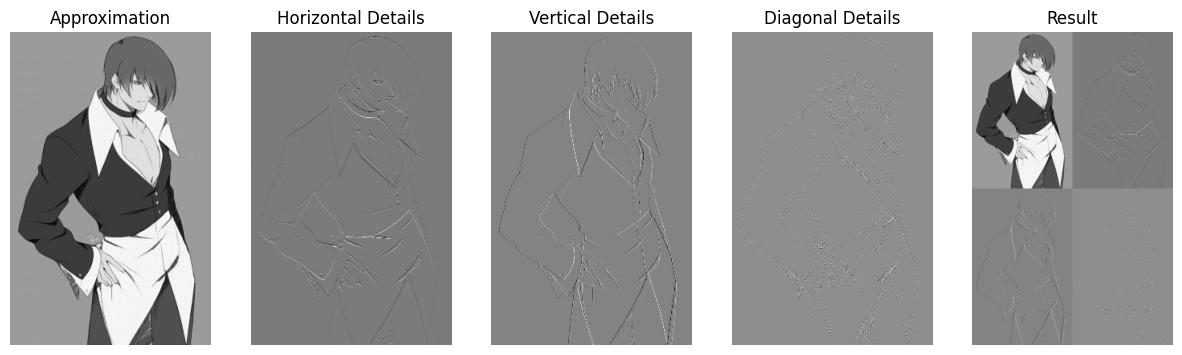

In [127]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].set_title('Approximation')
axs[0].imshow(LL, cmap='gray')
axs[0].axis('off')
axs[1].set_title('Horizontal Details')
axs[1].imshow(LH, cmap='gray')
axs[1].axis('off')
axs[2].set_title('Vertical Details')
axs[2].imshow(HL, cmap='gray')
axs[2].axis('off')
axs[3].set_title('Diagonal Details')
axs[3].imshow(HH, cmap='gray')
axs[3].axis('off')
axs[4].set_title('Result')
axs[4].imshow(wavelet_img, cmap='gray')
axs[4].axis('off')
plt.show()

Menampilkan hasil dekomposisi citra pada level 3, 4, 5 dan seterusnya

In [128]:
def interpolate(img, scale):
    height, width = img.shape
    new_height = height * scale
    new_width = width * scale
    interpolated_img = np.zeros((new_height, new_width))

    for i in range(new_height):
        for j in range(new_width):
            original_i = i / scale
            original_j = j / scale
            top_left = img[int(original_i)][int(original_j)]
            top_right = img[int(original_i)][min(int(original_j) + 1, width - 1)]
            bottom_left = img[min(int(original_i) + 1, height - 1)][int(original_j)]
            bottom_right = img[min(int(original_i) + 1, height - 1)][min(int(original_j) + 1, width - 1)]

            dx = original_j - int(original_j)
            dy = original_i - int(original_i)

            interpolated_value = (1 - dy) * ((1 - dx) * top_left + dx * top_right) + dy * ((1 - dx) * bottom_left + dx * bottom_right)
            interpolated_img[i][j] = interpolated_value

    return interpolated_img

Kode di atas merupakan implementasi dari fungsi interpolasi, yang digunakan untuk memperbesar citra dengan faktor skala tertentu. Fungsi ini menerima citra awal dan faktor skala sebagai input, kemudian menghasilkan citra yang telah diperbesar sesuai dengan skala yang ditentukan. Proses interpolasi dilakukan dengan mengambil nilai piksel dari citra awal yang berdekatan dengan posisi piksel baru dalam citra hasil interpolasi, kemudian melakukan interpolasi linear antara nilai-nilai piksel yang berdekatan tersebut untuk mendapatkan nilai piksel baru. Ini membantu meningkatkan resolusi citra tanpa kehilangan informasi penting.

In [129]:
def kombinasi_koefisien(levels, img, lL, lH, hL, hH):
    coeffs = [lL, lH, hL, hH]
    result = img
    for i in range(levels):
        for j in range(4):
            coeffs[j] = interpolate(coeffs[j], 2)

        result = kombinasi_wavelet(*coeffs)

    return result

Kode tersebut merupakan implementasi dari fungsi gabung_kombinasi, yang bertujuan untuk menggabungkan koefisien hasil transformasi wavelet pada berbagai level dengan proses interpolasi. Fungsi ini menerima tingkat level dekomposisi, citra asli, serta koefisien aproksimasi (lL), detail horizontal (lH), detail vertikal (hL), dan detail diagonal (hH) dari setiap level dekomposisi. Pada setiap iterasi, koefisien detail (lH, hL, hH) diperbesar menggunakan interpolasi dengan faktor skala 2. Setelah itu, koefisien yang telah diperbesar tersebut digabungkan kembali dengan koefisien aproksimasi dari level sebelumnya menggunakan fungsi kombinasi_wavelet. Proses ini dilakukan secara berulang sebanyak (levels - 1) kali, sehingga menghasilkan citra rekonstruksi yang lebih baik dengan resolusi yang lebih tinggi.

Kode di bawah bertujuan untuk melakukan transformasi wavelet pada citra abu-abu menggunakan fungsi dekomposisi_gambar dengan filter low-pass dan high-pass yang telah ditentukan. Hasil transformasi tersebut kemudian dinormalisasi dan digabungkan kembali menggunakan fungsi gabung_kombinasi untuk menghasilkan citra rekonstruksi dengan resolusi yang lebih tinggi. Citra rekonstruksi ini kemudian ditampilkan menggunakan matplotlib dalam skala abu-abu. Proses ini membantu dalam analisis atau pemrosesan citra dengan memungkinkan penggunaan resolusi yang lebih tinggi dan mempertahankan informasi yang relevan dari citra asli.

In [139]:
koefll, koeflh, koefhl, koefhh = dekomposisi_gambar(gray_img, low_pass, high_pass)
hasil = kombinasi_koefisien(4, gray_img, normalisasi(koefll), normalisasi(koeflh), normalisasi(koefhl), normalisasi(koefhh))
fig = plt.figure(figsize=(10, 7))
plt.axis('off')
plt.imshow(hasil, cmap='gray')
plt.show()

## Melakukan Rekontruksi Citra

2. Melakukan rekontruksi dari hasil dekomposisi

In [130]:
low_pass_filter = np.array([0.7, 0.7])
high_pass_filter = np.array([-0.7, 0.7])
low = np.zeros((ll.shape[0]*2, ll.shape[1]), dtype=float)
high = np.zeros((ll.shape[0]*2, ll.shape[1]), dtype=float)
reconstructed_img = np.zeros((ll.shape[0]*2, ll.shape[1]*2), dtype=float)

Kode di atas digunakan untuk merekonstruksi citra dari sub-blok hasil dekomposisi wavelet. Pertama, kami mendefinisikan low_pass_filter dan high_pass_filter untuk mengembalikan citra ke domain spasial. Kemudian, kami menyiapkan matriks kosong low dan high dengan dimensi yang diperluas dari sub-blok LL. Selanjutnya, citra hasil rekonstruksi disiapkan dalam reconstructed_img dengan dimensi dua kali lipat dari LL. Ini adalah langkah awal dalam proses rekonstruksi citra menggunakan transformasi wavelet.

In [131]:
for i in range(ll.shape[0]):
    for j in range(ll.shape[1]):
        low[i*2, j] = ll[i, j]/low_pass_filter[0] + lh[i, j]/high_pass_filter[0]
        low[i*2+1, j] = ll[i, j]/low_pass_filter[1] + lh[i, j]/high_pass_filter[1]
        high[i*2, j] = hl[i, j]/low_pass_filter[0] + hh[i, j]/high_pass_filter[0]
        high[i*2+1, j] = hl[i, j]/low_pass_filter[1] + hh[i, j]/high_pass_filter[1]

Kode di atas bertanggung jawab untuk melakukan invers transformasi wavelet pada sub-blok hasil dekomposisi, dengan tujuan merekonstruksi citra dari komponen-komponen wavelet. Setiap elemen dalam sub-blok LL, LH, HL, dan HH digunakan untuk menghitung nilai piksel dalam citra hasil rekonstruksi. Proses ini mengikuti aturan invers transformasi wavelet dengan membagi setiap elemen dengan nilai filter yang sesuai dan kemudian menjumlahkan hasilnya sesuai dengan lokasi piksel pada citra rekonstruksi.

In [132]:
for i in range(low.shape[0]):
    for j in range(low.shape[1]):
        reconstructed_img[i, j*2] = low[i, j]/low_pass_filter[0] + high[i, j]/high_pass_filter[0]
        reconstructed_img[i, j*2+1] = low[i, j]/low_pass_filter[1] + high[i, j]/high_pass_filter[1]

Kode di atas bertanggung jawab untuk menghasilkan citra rekonstruksi dari citra yang telah di-dekomposisi menggunakan transformasi wavelet. Ini dilakukan dengan menggunakan komponen hasil dekomposisi (LL, LH, HL, dan HH) untuk menghitung nilai piksel dalam citra rekonstruksi. Proses invers transformasi wavelet dilakukan dengan menggabungkan kembali setiap sub-blok dalam citra wavelet menggunakan filter invers yang sesuai dan menjumlahkan hasilnya untuk membangun kembali citra asli.

Kode di bawah digunakan untuk menampilkan citra rekonstruksi hasil dari proses invers transformasi wavelet. Ini memungkinkan kita untuk memvisualisasikan citra yang telah direkonstruksi setelah dilakukan dekomposisi menggunakan transformasi wavelet. Dengan menggunakan plt.title untuk memberikan judul pada gambar dan plt.imshow untuk menampilkan citra dalam skala abu-abu, kita dapat melihat hasil dari proses rekonstruksi dengan bantuan library matplotlib.

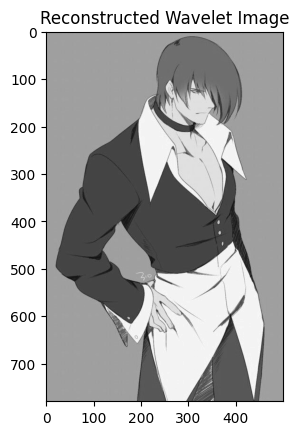

In [133]:
plt.title("Reconstructed Wavelet Image")
plt.imshow(reconstructed_img, cmap='gray')
plt.show()

Kode di bawah digunakan untuk melakukan multiple-level decomposition dari citra menggunakan transformasi wavelet. Proses ini dilakukan secara iteratif sebanyak lima kali, dimulai dari level pertama hingga level kelima. Pada setiap iterasi, citra aproksimasi dan detail horizontal, vertikal, serta diagonal diambil dari hasil dekomposisi sebelumnya sebagai input untuk iterasi berikutnya. Setelah dilakukan dekomposisi, hasilnya ditampilkan dalam empat subplot dengan judul yang sesuai menggunakan matplotlib. Ini membantu dalam memahami kontribusi dari setiap detail dalam representasi wavelet citra pada berbagai level dekomposisi.

Kode di bawah ini adalah contoh penggunaan loop untuk melakukan beberapa iterasi dari proses dekomposisi gambar menggunakan filter low-pass dan high-pass. Dalam setiap iterasi, hasil dekomposisi dari iterasi sebelumnya digunakan sebagai input untuk mendapatkan hasil dekomposisi pada iterasi berikutnya. Proses ini membantu dalam menganalisis detail dan komponen penting dari gambar dalam berbagai arah, yaitu horizontal, vertikal, dan diagonal. Hasil dari masing-masing komponen ini dapat digunakan untuk berbagai tujuan, seperti pemrosesan citra, analisis struktur gambar, atau kompresi gambar. Dalam contoh ini, hasil dekomposisi ditampilkan dalam empat subplot untuk setiap jenis komponen (approximation, horizontal, vertical, dan diagonal) menggunakan matplotlib.

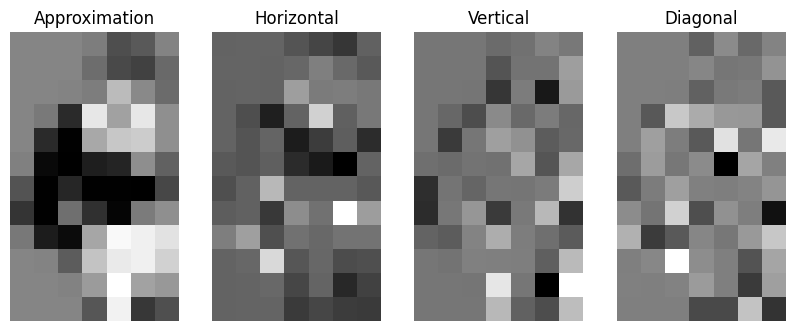

In [134]:
approximation = ll
horizontal_details = lh
vertical_details = hl
diagonal_details = hh

for i in range(5):
    approximation, horizontal_details, vertical_details, diagonal_details = dekomposisi_gambar(approximation, low_pass, high_pass)
    
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 4, 1)
plt.imshow(approximation, cmap='gray')
plt.title("Approximation")
plt.axis('off')
fig.add_subplot(1, 4, 2)
plt.imshow(horizontal_details, cmap='gray')
plt.title("Horizontal")
plt.axis('off')
fig.add_subplot(1, 4, 3)
plt.imshow(vertical_details, cmap='gray')
plt.title("Vertical")
plt.axis('off')
fig.add_subplot(1, 4, 4)
plt.imshow(diagonal_details, cmap='gray')
plt.title("Diagonal")
plt.axis('off')

plt.show()

3. pada level berapa hasil dari dekomposisi berikut? berikan alasannya

Hasil dari dekomposisi di atas terdapat pada level 6. Proses dekomposisi wavelet dilakukan dengan membagi gambar awal menjadi dua komponen utama: aproksimasi (rendah frekuensi) dan detail (tinggi frekuensi), menggunakan filter low-pass dan high-pass. Kemudian, proses dekomposisi tersebut dilakukan secara berulang pada komponen aproksimasi hasil sebelumnya untuk mendapatkan tingkat resolusi yang lebih rendah. Pada level 6, gambar aproksimasi yang dihasilkan merupakan representasi kasar dari gambar awal setelah melalui enam tingkat dekomposisi wavelet. Gambar tersebut menampilkan fitur-fitur utama dan kontur umum dari gambar asli, sementara detail halusnya telah dihilangkan. Ini membuat gambar pada level 6 terlihat lebih kabur dan kurang rinci dibandingkan dengan gambar asli. Tingkat dekomposisi yang tinggi, seperti level 6, cocok digunakan untuk tujuan seperti kompresi gambar atau analisis tekstur, di mana detail halus tidak diperlukan atau dianggap sebagai noise.

Kode di bawah digunakan untuk menampilkan grafik amplitude dari citra aproksimasi setelah proses multiple-level decomposition menggunakan transformasi wavelet. Dengan menggunakan plt.plot, kita membuat grafik garis dengan nilai amplitudo citra aproksimasi yang diratakan (ravel()) dari setiap piksel pada citra. Grafik ditampilkan dengan label sumbu x sebagai "Index" dan label sumbu y sebagai "Amplitude". Ini membantu dalam visualisasi distribusi amplitudo di seluruh citra aproksimasi, yang dapat memberikan pemahaman tentang struktur dan komposisi citra tersebut pada level tertentu dari dekomposisi wavelet.

4. Menampilan representasi sinyal pada hasil dekomposisi pada nomor 3

Kode di bawah digunakan untuk membuat plot garis dari komponen aproksimasi hasil dekomposisi wavelet. Dengan menggunakan fungsi plt.plot, data dari komponen aproksimasi new_ll diubah menjadi satu dimensi menggunakan metode ravel() untuk kemudian diplot sebagai garis biru. Label sumbu x dan y ditambahkan menggunakan fungsi plt.xlabel dan plt.ylabel untuk memberikan informasi mengenai indeks dan amplitudo dari data yang diplot. Hasilnya adalah sebuah grafik garis yang menampilkan nilai amplitudo dari komponen aproksimasi, dengan sumbu x merepresentasikan indeks (urutan) data, dan sumbu y merepresentasikan amplitudo. Grafik ini membantu dalam visualisasi distribusi amplitudo dari komponen aproksimasi tersebut.

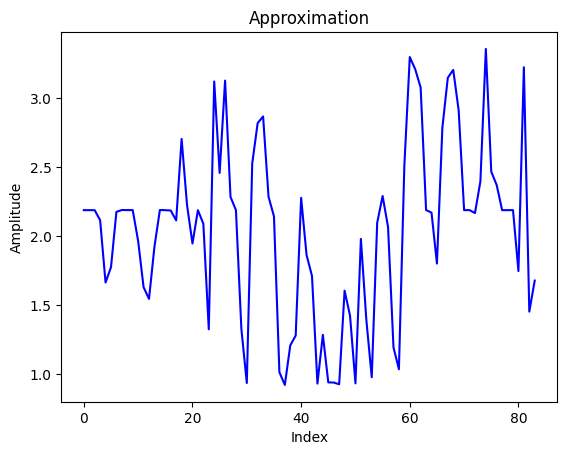

In [135]:
plt.title('Approximation')
plt.plot([j for j in range(0,  approximation.shape[0]* approximation.shape[1])],  approximation.ravel(), color='blue')
plt.xlabel('Index')
plt.ylabel('Amplitude') 
plt.show()


Kode di bawah digunakan untuk menampilkan grafik amplitude dari detail horizontal citra setelah proses multiple-level decomposition menggunakan transformasi wavelet. Dengan menggunakan plt.plot, kita membuat grafik garis dengan nilai amplitudo dari detail horizontal citra yang diratakan (ravel()) dari setiap piksel pada citra. Grafik ditampilkan dengan label sumbu x sebagai "Index" dan label sumbu y sebagai "Amplitude". Ini membantu dalam visualisasi distribusi amplitudo dari detail horizontal citra, yang dapat memberikan pemahaman tentang tekstur atau struktur horizontal yang terdapat dalam citra pada level tertentu dari dekomposisi wavelet.

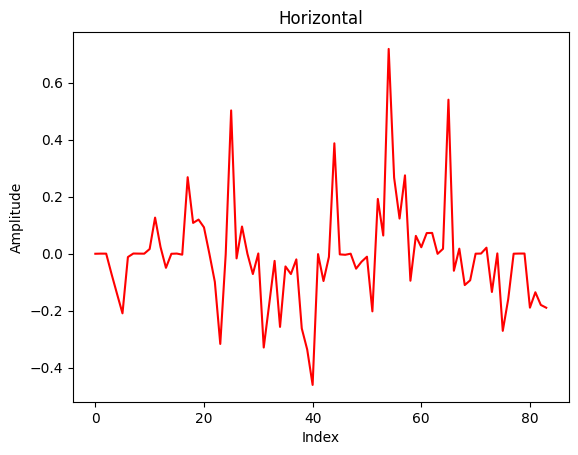

In [136]:
plt.title('Horizontal')
plt.plot([j for j in range(0, horizontal_details.shape[0]*horizontal_details.shape[1])], horizontal_details.ravel(), color='red')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

Kode di bawah bertujuan untuk menampilkan grafik amplitudo dari detail vertikal citra setelah proses dekomposisi multiple-level menggunakan transformasi wavelet. Dengan menggunakan plt.plot, kita membuat grafik garis dengan nilai amplitudo dari detail vertikal citra yang diratakan (ravel()) dari setiap piksel pada citra. Grafik ditampilkan dengan label sumbu x sebagai "Index" dan label sumbu y sebagai "Amplitudo". Hal ini membantu dalam memvisualisasikan distribusi amplitudo dari detail vertikal citra, yang dapat memberikan pemahaman tentang tekstur atau struktur vertikal yang terdapat dalam citra pada level tertentu dari dekomposisi wavelet.

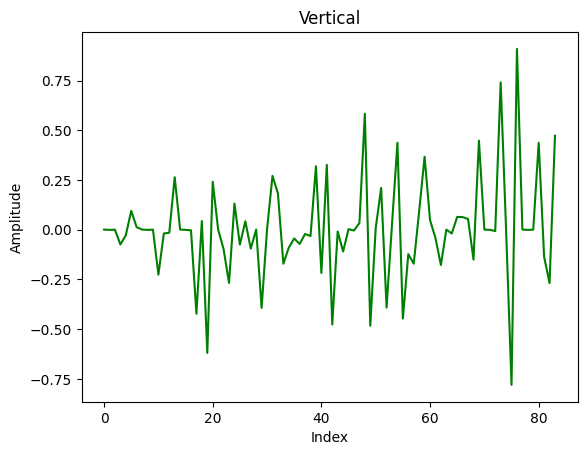

In [137]:
plt.title('Vertical')
plt.plot([j for j in range(0, vertical_details.shape[0]*vertical_details.shape[1])], vertical_details.ravel(), color='green')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

Kode di bawah digunakan untuk menampilkan grafik amplitudo dari detail diagonal citra setelah proses dekomposisi multiple-level menggunakan transformasi wavelet. Dengan menggunakan plt.plot, kita membuat grafik garis dengan nilai amplitudo dari detail diagonal citra yang diratakan (ravel()) dari setiap piksel pada citra. Grafik ditampilkan dengan label sumbu x sebagai "Index" dan label sumbu y sebagai "Amplitudo". Grafik ini membantu dalam memvisualisasikan distribusi amplitudo dari detail diagonal citra, yang dapat memberikan pemahaman tentang tekstur atau struktur diagonal yang terdapat dalam citra pada level tertentu dari dekomposisi wavelet.

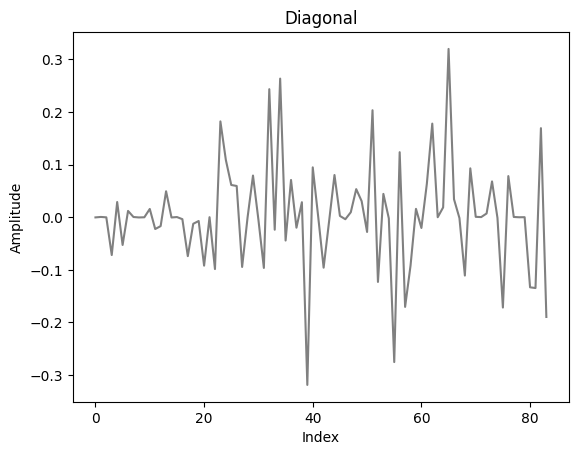

In [138]:
plt.title('Diagonal')
plt.plot([j for j in range(0, diagonal_details.shape[0]*diagonal_details.shape[1])], diagonal_details.ravel(), color='gray')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()